# INTRODUÇÃO:

No presente notebook, buscamos entender como o algoritmo de aprendizado de máquina Support Vector Machine funciona para tarefas de regressão de dados, explicando didáticamente como o modelo funciona. Após a parte teórica, vamos aplicar o modelo Support Vector Regressor para previsão de dados de emissão de monóxido de carbono presentes no dataset "Superconductivty Data".

# Desenvolvimento:

### Support Vector Machine (Regressor):

O objetivo do Support Vector Regressor (SVR) é encontrar uma função de predição para o conjunto de dados que minimize o erro de previsão, mas que também seja simples e se encaixe para a maioria dos dados. Isso acontece com o modelo construindo uma "margem de tolerância" em torno da função de predição encontrada, onde apenas erros maiores que uma certa tolerância (épsilon) são penalizados.
O SVR tenta ajustar uma linha (ou hiperplano, em dimensões maiores) aos dados de maneira que a maioria dos pontos caia dentro de uma margem de tolerância ao redor dessa linha. A ideia principal é encontrar uma função f(x) que esteja o mais próximo possível dos dados.

Quando temos um conjunto de dados de treinamento, onde Xn é um conjunto de N observações com valores previstos Yn, o SVR tenta encontrar a função [1]:
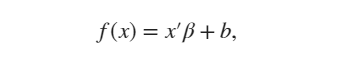
onde `β` é o vetor de pesos, que define a inclinação do hiperplano de predição, e `b` é o termo de bias, que "desloca" o hiperplano para cima ou para baixo, o ajustando à distribuição dos dados.

A "margem de tolerância" é definida por um valor de épsilon (ϵ), também conhecidas como "variáveis de folga". Se o erro da predição estiver dentro dessa margem, ele não será penalizado, por isso no SVR o épsilon é chamado de ϵ-insensível. Isso garante que o modelo seja menos sensível a pequenas variações nos dados e preveja o comportamento geral dos dados, ignorando pequenos ruídos. A função de perda linear ignora os erros que estão dentro da margem ε de distância do valor observado, os considerando como iguais a zero. Assim, o problema de otimização nos leva a equação primordial, que buscamos minimizar [1]:
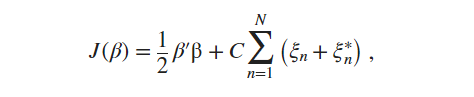

sujeito a [1]:
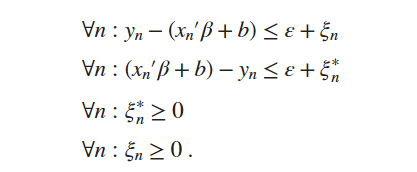
onde:

* `ξn` e `ξ*n`: são as variáveis de folga que permitem que alguns pontos fiquem fora da margem ϵ;

* `C`: é um hiperparâmetro de valor numérico positivo que controla a penalização imposta aos pontos que estão fora da margem de tolerância e ajuda a evitar o sobreajuste (overfitting).

* `ϵ`: é o parâmetro de margem de tolerância, que define a região em torno do hiperplano de predição onde os erros não são penalizados. Quanto maior o valor de ϵ, maior a margem de tolerância e mais flexível o modelo, fazendo com que ignore mais erros dentro da margem. Quanto menor menor o ϵ, menor a margem de tolerância, fazendo com que o modelo tente se ajustar mais aos dados de treino. 

Além destes, outros hiperparâmetros importantes no SVR são: 
* `kernel`: se aplica tanto em SVM classificador quanto regressor, permite com que o modelo utilize diferentes tipos de kernel para lidar com dados que não estão linearmente separados (ou seja, dados que é preciso alterar a dimensão). Os kernels mais comuns são:
    * `Linear`: utilizado para dados lineares;
    * `Polinomial`: utilizado quando a relação entre as variáveis é quadrática, ou de outro grau de curvatura; 
    * `RBF (Radial Basis Function)`: é o kernel padrão e é utilizado para dados com uma relação complexa (mais de 4 dimensões, por exemplo).
    
* `degree`: só é utilizado quando o kernel polinomial é selecionado, sendo 0 para os outros kernels. Define o grau do polinômio (grau 2, grau 3, etc) usado pelo kernel, controlando a complexidade da função de previsão.

A função usada para previsão do SVR com kernel é descrita como:
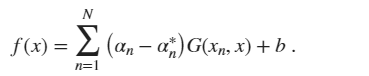
onde:
* `G(xn,x)`: é o kernel que calcula a similaridade entre xn e x;
* `αn − α∗n`: são os coeficientes ajustados no treinamento do modelo.

### Aplicando o Support Vector Regressor ao dataset "Superconductivty Data":

Primeiro, vamos importar as bibliotecas necessárias e introduzir o dataset utilizado.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from optuna import create_study

dt = pd.read_csv("https://raw.githubusercontent.com/Romulo177/PF-Machine-Learning/refs/heads/main/dataset/supercondutividade_dados.csv")
dt = dt.dropna()
dt

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


Um passo importante para treinar o modelo é otimizar os hiperparâmetros do SVR. Vamos fazer isso utilizando a biblioteca Optuna [6]. Começaremos definindo os dados de treino e teste e normalizando os dados. 

In [42]:
FEATURES = ['mean_atomic_mass',
 'wtd_range_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_range_fie',
 'mean_atomic_radius',
 'wtd_range_atomic_radius',
 'wtd_entropy_Density',
 'range_Density',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'gmean_FusionHeat',
 'range_FusionHeat',
 'wtd_range_FusionHeat',
 'mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'entropy_ThermalConductivity',
 'wtd_range_ThermalConductivity',
 'gmean_Valence',
 'range_Valence'
]

TARGET = ['critical_temp']

X = dt.reindex(FEATURES,axis=1).values
y = dt.reindex(TARGET, axis=1).values.ravel()

from sklearn.model_selection import train_test_split

seed = 42 # semente que vai ser usada para que os parâmetros das linhas sejam sempre os mesmos

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=seed) 
# definimos que durante o treino o modelo vai ter acesso a 80% dos dados, enquanto no teste ele vai ter acesso aos 20% dos dados que ainda não conhecia, tentando prever os targets

scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)  # ajuste e transformação no treino
X_teste = scaler.transform(X_teste)

Agora sim, podemos instanciar o optuna para criar o modelo.

In [43]:
def cria_instancia_modelo(trial):
    
    parametros = {
        "C": trial.suggest_float(
            "C", 0.1, 1.0
        ),
        "epsilon": trial.suggest_float(
            "epsilon", 0.01, 0.1
        ),
        "kernel": trial.suggest_categorical(
            "kernel", ['linear', 'poly', 'rbf', 'sigmoid']
        ),
    }

    modelo = SVR(**parametros)

    return modelo

Agora que instanciamos o modelo, podemos utilizar o método de validação cruzada para comparar os parâmetros definidos no optuna, computando a métrica de interesse com a função objetivo (nesse caso RMSE) e vendo qual deles se saiu melhor.

In [44]:
def funcao_objetivo(trial, X, y, num_folds):

    modelo = cria_instancia_modelo(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    return -metricas.mean()

In [45]:
NOME_DO_ESTUDO = "svr_CO"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

NUM_FOLDS = 10
 # precisamos de uma função que tenha apenas um argumento: o trial
def funcao_objetivo_parcial(trial):
    return funcao_objetivo(trial, X_treino, y_treino, NUM_FOLDS)

[I 2024-10-27 23:06:21,094] Using an existing study with name 'svr_CO' instead of creating a new one.


Por fim, vamos testar o que conseguimos até agora, para obter resultados palpáveis.

In [46]:
NUM_TENTATIVAS = 10

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

df = objeto_de_estudo.trials_dataframe()

df

[I 2024-10-27 23:09:12,343] Trial 16 finished with value: 21.75327027805337 and parameters: {'C': 0.7310372965862804, 'epsilon': 0.09847066212275553, 'kernel': 'linear'}. Best is trial 9 with value: 1.2365474409837311.
[I 2024-10-27 23:11:54,554] Trial 17 finished with value: 21.75367219245556 and parameters: {'C': 0.9921327088509269, 'epsilon': 0.011236013267010202, 'kernel': 'linear'}. Best is trial 9 with value: 1.2365474409837311.
[I 2024-10-27 23:14:43,045] Trial 18 finished with value: 21.753808238153837 and parameters: {'C': 0.7017964611912687, 'epsilon': 0.06492946431414312, 'kernel': 'linear'}. Best is trial 9 with value: 1.2365474409837311.
[I 2024-10-27 23:17:29,678] Trial 19 finished with value: 21.753599440086198 and parameters: {'C': 0.7475938122094146, 'epsilon': 0.07111756663391021, 'kernel': 'linear'}. Best is trial 9 with value: 1.2365474409837311.
[I 2024-10-27 23:19:56,364] Trial 20 finished with value: 21.73184024782963 and parameters: {'C': 0.12266828604784497, 'e

,number,value,datetime_start,datetime_complete,duration,params_C,params_epsilon,params_kernel,state
0,0,NaN,2024-10-27 16:29:39.451316,2024-10-27 16:29:39.498765,0 days 00:00:00.047449,NaN,NaN,NaN,FAIL
1,1,NaN,2024-10-27 16:30:49.315263,2024-10-27 16:30:49.362545,0 days 00:00:00.047282,NaN,NaN,NaN,FAIL
2,2,NaN,2024-10-27 16:31:05.807596,2024-10-27 16:31:05.879367,0 days 00:00:00.071771,NaN,NaN,NaN,FAIL
3,3,NaN,2024-10-27 16:31:46.927059,2024-10-27 16:31:47.036259,0 days 00:00:00.109200,0.321063,NaN,NaN,FAIL
4,4,NaN,2024-10-27 16:32:46.075451,2024-10-27 16:32:46.195776,0 days 00:00:00.120325,0.681707,0.022754,sigmoid,FAIL
5,5,NaN,2024-10-27 16:33:01.624051,2024-10-27 16:33:26.138660,0 days 00:00:24.514609,0.818370,0.073763,sigmoid,FAIL
6,6,1.750399,2024-10-27 16:33:29.491224,2024-10-27 16:33:48.995157,0 days 00:00:19.503933,0.547757,0.021914,poly,COMPLETE
7,7,1.780020,2024-10-27 16:33:49.074258,2024-10-27 16:34:06.483715,0 days 00:00:17.409457,0.452754,0.050663,poly,COMPLETE
8,8,1.827970,2024-10-27 16:34:06.544467,2024-10-27 16:34:26.042099,0 days 00:00:19.497632,0.337139,0.045468,poly,COMPLETE
9,9,1.236547,2024-10-27 16:34:26.114073,2024-10-27 16:37:03.525868,0 days 00:02:37.411795,0.554375,0.096804,linear,COMPLETE


In [47]:
melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

Número do melhor trial: 9
Parâmetros do melhor trial: {'C': 0.5543747594432691, 'epsilon': 0.09680354191587619, 'kernel': 'linear'}


Agora sim, vamos treinar o modelo com os hiperparâmetros otimizados.

In [48]:
melhores_parametros = {
    'C': 0.5543747594432691,
    'epsilon': 0.09680354191587619,
    'kernel': 'linear',
}

modelo_ad = SVR(
    C = melhores_parametros['C'],
    epsilon = melhores_parametros['epsilon'],
    kernel = melhores_parametros['kernel'],
)

modelo_ad.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsto = modelo_ad.predict(X_teste)
RMSE = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(
    f"O RMSE do modelo Support Vector Regressor usando os hiperparâmetros otimizados foi de {RMSE:.2f} unidades de y."
)

O RMSE do modelo Support Vector Regressor usando os hiperparâmetros otimizados foi de 21.34 unidades de y.


Mas e se o RMSE do modelo for menor *sem* otimizar os dados? 

In [51]:
seed = 42

# treinando o modelo SVR
regressor = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1) # o valor de C = 1.0 foi escolhido pois penaliza os dados fora da margem de erro, mas se mantém relativamente flexível
# o valor de ϵ = 0.1 foi escolhido para manter uma margem razoável, evitando que o ocorra overfitting ou underfitting
regressor.fit(X_treino, y_treino)

y_prev = regressor.predict(X_teste)
print(f'O valor previsto de emissão de monóxido de carbono foi: {y_prev}, e o valor real era: {y_teste}.')

rmse = mean_squared_error(y_teste, y_prev, squared = False) # métricas de desempenho

print(f"Root Mean Squared Error (MSE): {rmse}")

O valor previsto de emissão de monóxido de carbono foi: [ 7.69440947 82.39997402 62.41142332 ...  7.36849287 11.14422655
 17.69506112], e o valor real era: [ 6.4  91.2  38.   ...  3.5   8.7   2.15].
Root Mean Squared Error (MSE): 16.329907637811505


Percebemos então que, de fato, o modelo se saiu melhor quando não otimizamos os hiperparâmetros. Isso se deve porque a otimização foi feita com um número muito pequeno de tentativas, então o valor padrão utilizado na maioria dos casos se encaixa melhor.

# CONCLUSÃO:

Podemos concluir então, que um dos fatores limitadores do Support Vector Machine é a quantidade de dados disponíveis no dataset. Isso se dá porque cada dado de treino é analisado durante o treinamento, buscando a função que melhor descreve todos eles, para que depois seja criado o hiperplano que se encaixe na margem de erro calculada. No teste, o modelo tem ainda que fazer o mesmo para todos os dados de teste, comparando-os com a função, com seus vizinhos e com o hiperplano. Dessa forma, quanto maior o dataset, mais comparações serão feitas, e mais demora para realizar o método de suporte de vetores. 
Não é viável utilizar o Gaussian Processes no nosso dataset pois ele é muito grande, e também não é possível usar o modelo Naive Bayes porque os dados tem alta correlação.
Assim, nossa guilda pôde acumular XP em Descobertas Flamejantes (Aprendizagem de novos modelos), atingindo o nível 100, um dos mais altos do Reino de Lumi.

# REFERÊNCIAS:

[1] MathWorks. *"Understanding Support Vector Machine Regression"*. Disponível em: https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

[2] Scikit-Learn. *Support Vector Regressor*. Disponível em: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html

[3] RASIFAGHIHI, Niousha. *From Theory to Practice: Implementing Support Vector Regression for Predictions in Python*. Disponível em: https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927

[4] I Know Python. *Machine Learning With Python Video 17 : Support Vector Regression (SVR)*. Disponível em: https://www.youtube.com/watch?v=-EjQWqHMsog

[5] StatQuest with Josh Starmer. *Support Vector Machines Part 1 (of 3): Main Ideas!!!*. Disponível em: https://www.youtube.com/watch?v=efR1C6CvhmE

[6] CASSAR, Daniel. *Otimização de hiperparâmetros com optuna --- exemplo guiado*

[7] *Superconductivty Data*. Disponível em: https://archive.ics.uci.edu/dataset/464/superconductivty+data